In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel("housing.xlsx")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
data.shape

(20640, 10)

In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


All features are numerical except **ocean_proximity** which is an object.

In [6]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Under the ocean_proximity feature we have 5 values. These values tell us where the houses are located in California. The values are repetitive under this feature, which makes it a categorical attribute.

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The describe() gives us a summary statistics about the numerical attributes. Here we can get an idea what are minimum values, maximum values, mean, standard deviation, quartiles.

array([[<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'total_rooms'}>]], dtype=object)

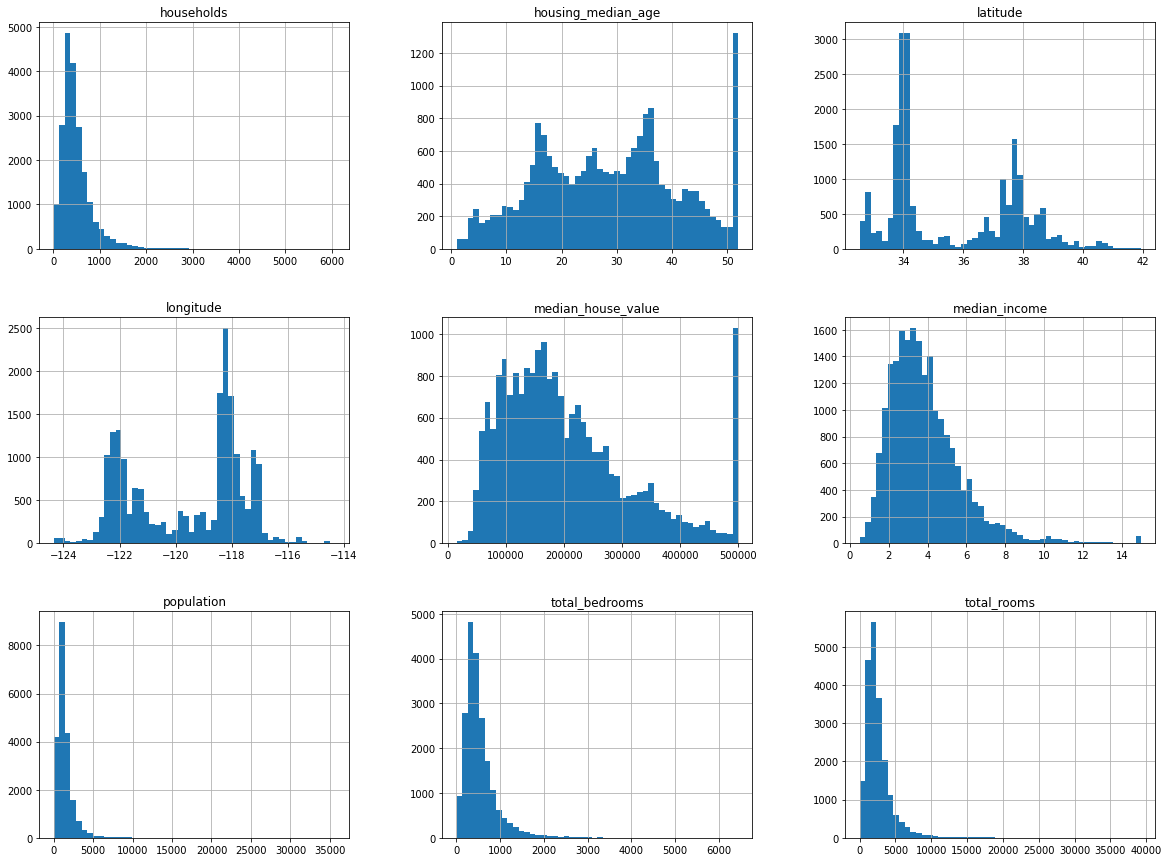

In [8]:
data.hist(bins=50, figsize=(20, 15))

households, median_income, population, total_bedrooms, total_rooms, median_house_value are right skewed.

We need to transform them into bell-curve distributions.

We can also see there are some features that are already scaled and capped. Like median_income, housing_median age and median_house_value are scaled and capped.

**First completed**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 720x504 with 0 Axes>

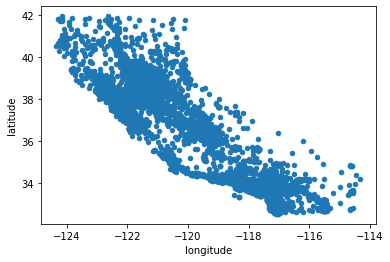

In [9]:
plt.figure(figsize=(10,7))
data.plot(kind="scatter", x="longitude", y="latitude")

A more refined plot representation of the above scatterplot is below.

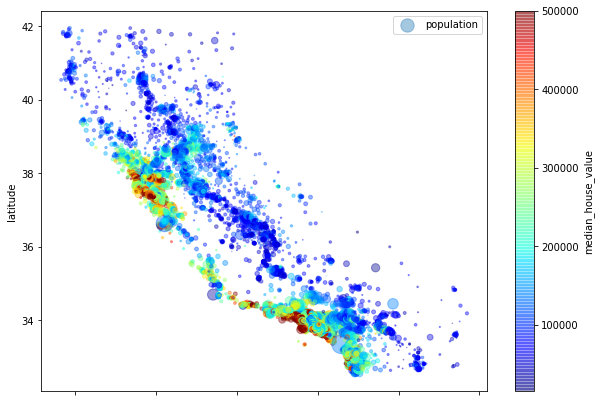

In [10]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["population"]/100,
           label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
          )
plt.legend()

We can clearly see with the help of legend which areas are of high value.

<AxesSubplot:>

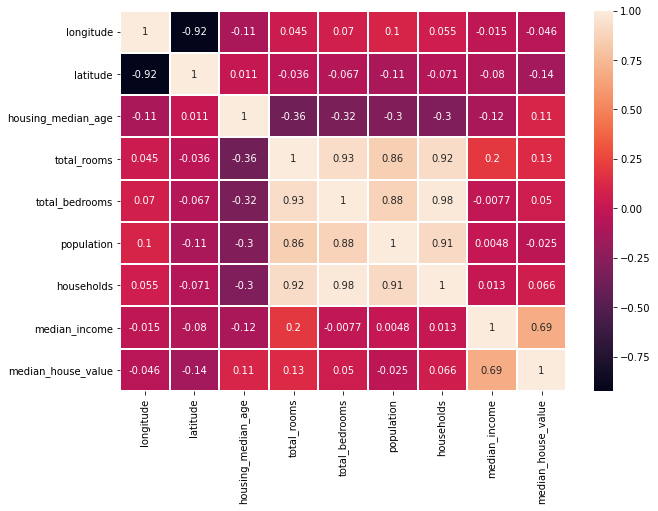

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data.corr(), annot=True, linewidths=1.0, )

- media_house_value is negatively correlated to latitude. As latitude increases the median_house_value decreases(ie, if we go North the house value decreases)

- median_income and median_house_value are positively correlated, as one increases the other also increases.

- we can also see that there are other features that are positively correlated to each other like: 
    - total_bedrooms-total_rooms
    - population-total_rooms
    - households-total_rooms
    - population-total_bedrooms
    - households-total_bedrooms
    - households-population.

In [12]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Here we can see that total_bedrooms feature has 207 missing values.

As given we have to fill the missing values with mean of respective column.

In [13]:
mean = data["total_bedrooms"].mean()
data["total_bedrooms"].fillna(mean, inplace=True)

In [14]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**Second completed**

In [15]:
data_ocean_proximity = pd.get_dummies(data["ocean_proximity"])
data_new = pd.concat([data, data_ocean_proximity], axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [16]:
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0


In [17]:
data_new.drop(["ocean_proximity"], axis=1, inplace=True)

**Third Completed**

In [18]:
X = data_new.drop(["median_house_value"], axis=1)
y = data_new["median_house_value"]

In [19]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [20]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

In [22]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (16512, 13)
X_test:  (4128, 13)
y_train:  (16512,)
y_test:  (4128,)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_lr_pred = lin_reg.predict(X_test_sc)

In [28]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_actual, y_predicted, squared=False)

In [29]:
print("RMSE value for Linear Regression: {}".format(mean_squared_error(y_test, y_lr_pred, squared=False)))

RMSE value for Linear Regression: 68596.17811482876


In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_sc, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
y_dt_pred = dt_reg.predict(X_test_sc)

In [33]:
print("RMSE value for Decision Tree Regressor: {}".format(mean_squared_error(y_test, y_dt_pred, squared=False)))

RMSE value for Decision Tree Regressor: 67173.196472702


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfg_reg = RandomForestRegressor()
rfg_reg.fit(X_train_sc, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
y_rfg_pred = rfg_reg.predict(X_test_sc)

In [37]:
print("RMSE value for Random Forest Regressor: {}".format(mean_squared_error(y_test, y_rfg_pred, squared=False)))

RMSE value for Random Forest Regressor: 48163.166597758696
